Bayesian Statistics Made Simple
===

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2016 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import matplotlib.pyplot as plt

from empiricaldist import Pmf

### The dice problem

Create a Suite to represent dice with different numbers of sides.

In [2]:
dice = Pmf.from_seq([4, 6, 8, 12])
dice

,probs
4,0.25
6,0.25
8,0.25
12,0.25


**Exercise 1:** We'll solve this problem two ways.  First we'll do it "by hand", as we did with the cookie problem; that is, we'll multiply each hypothesis by the likelihood of the data, and then renormalize.

In the space below, update `dice` based on the likelihood of the data (rolling a 6), then normalize and display the results.

In [3]:
# Solution

dice[4] *= 0
dice[6] *= 1/6
dice[8] *= 1/8
dice[12] *= 1/12

dice.normalize()
dice

,probs
4,0.000000
6,0.444444
8,0.333333
12,0.222222


**Exercise 2:**  Now let's do the same calculation using `Pmf.update`, which encodes the structure of a Bayesian update.

Define a function called `likelihood_dice` that takes `data` and `hypo` and returns the probability of the data (the outcome of rolling the die) for a given hypothesis (number of sides on the die).

Hint: What should you do if the outcome exceeds the hypothetical number of sides on the die?

Here's an outline to get you started.

In [4]:
def likelihood_dice(data, hypo):
    """Likelihood function for the dice problem.
    
    data: outcome of the die roll
    hypo: number of sides
    
    returns: float probability
    """
    # TODO: fill this in!
    return 1

In [5]:
# Solution
    
def likelihood_dice(data, hypo):
    """Likelihood function for the dice problem.
    
    data: outcome of the die roll
    hypo: number of sides
    
    returns: float probability
    """
    if data > hypo:
        return 0
    else:
        return 1 / hypo

Now we can create a `Pmf` object and update it.

In [6]:
dice = Pmf.from_seq([4, 6, 8, 12])
dice.update(likelihood_dice, 6)
dice

,probs
4,0.000000
6,0.444444
8,0.333333
12,0.222222


If we get more data, we can perform more updates.

In [7]:
for roll in [8, 7, 7, 5, 4]:
    dice.update(likelihood_dice, roll)

Here are the results.

In [8]:
dice

,probs
4,0.000000
6,0.000000
8,0.919294
12,0.080706


### The German tank problem

The German tank problem is actually identical to the dice problem.

In [9]:
def likelihood_tank(data, hypo):
    """Likelihood function for the tank problem.
    
    data: observed serial number
    hypo: number of tanks
    
    returns: float probability
    """
    if data > hypo:
        return 0
    else:
        return 1 / hypo

Here is the update after seeing Tank #42.

In [10]:
tank = Pmf.from_seq(range(100))
tank.update(likelihood_tank, 42)
tank.mean()

66.32784309363326

And here's what the posterior distribution looks like.

In [11]:
def decorate_tank(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Number of tanks')
    plt.ylabel('PMF')
    plt.title(title)

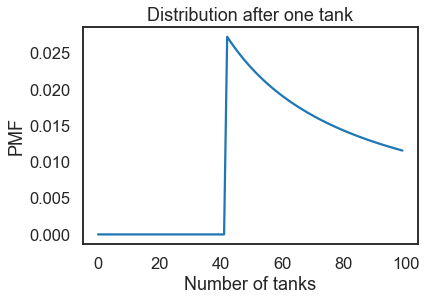

In [12]:
tank.plot()
decorate_tank('Distribution after one tank')

**Exercise 3:**  Suppose we see another tank with serial number 17.  What effect does this have on the posterior probabilities?

Update the `Pmf` with the new data and plot the results.

62.25994473449364

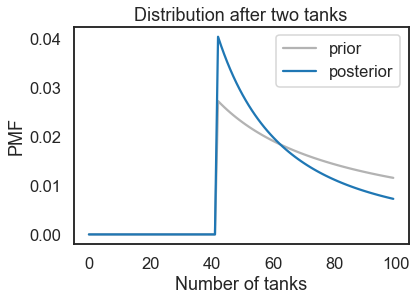

In [13]:
# Solution

tank.plot(color='0.7', label='prior')
tank.update(likelihood_tank, 17)
tank.plot(label='posterior')

plt.legend()
decorate_tank('Distribution after two tanks')

tank.mean()